### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
from imblearn.over_sampling import SMOTE

### Reading and displaying data

In [2]:
df = pd.read_csv("E:\\sem3\\projectsem3\\dataset.csv")
df

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,NaN,0


In [3]:
df = pd.DataFrame(df)
df.rename(columns={'male': 'Gender'}, inplace=True)
columns_to_drop = ['education']
df.drop(columns=columns_to_drop, inplace=True)
df

,Gender,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0,1
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0,0
4235,0,48,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,86.0,0
4236,0,44,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,NaN,0


In [4]:
df = df.fillna(df.mean())

In [5]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [6]:

X = df.drop(columns=['Gender'])  
y = df['Gender']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender
0,39,0.000000,0.0,0,0,0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1
1,46,0.000000,0.0,0,0,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0
2,48,20.000000,0.0,0,0,0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1
3,61,30.000000,0.0,0,1,0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0
4,46,23.000000,0.0,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,43,4.580894,0.0,0,0,0,221.508814,107.289661,69.491186,24.738661,82.474270,0,1
4834,46,24.981679,0.0,0,0,0,172.974350,117.472518,77.472518,20.229047,74.978015,0,1
4835,55,0.000000,0.0,0,0,0,260.410255,126.602564,76.512819,25.142051,70.000000,0,1
4836,44,20.000000,0.0,0,0,0,241.756335,127.731690,82.780284,25.687536,70.926761,0,1


In [7]:

X = df.drop(columns=['prevalentHyp'])  
y = df['prevalentHyp']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender,prevalentHyp
0,39,0.000000,0.000000,0,0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1,0
1,46,0.000000,0.000000,0,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0
2,48,20.000000,0.000000,0,0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1,0
3,61,30.000000,0.000000,0,0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0,1
4,46,23.000000,0.000000,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,56,0.000000,0.000000,0,0,151.445434,99.120824,62.241648,24.988808,72.117436,0,0,1
6804,57,0.000000,0.000000,0,0,240.983360,143.491680,85.483360,24.014163,81.983670,0,0,1
6805,58,0.000000,0.000000,0,0,313.300748,157.300748,102.398503,24.773728,81.985585,0,0,1
6806,56,2.722124,0.000000,0,0,265.463127,149.536873,83.722124,28.725764,73.000000,0,0,1


In [8]:

X = df.drop(columns=['prevalentStroke'])  
y = df['prevalentStroke']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender,prevalentHyp,prevalentStroke
0,39,0.000000,0.000000,0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1,0,0
1,46,0.000000,0.000000,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0,0
2,48,20.000000,0.000000,0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1,0,0
3,61,30.000000,0.000000,0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0,1,0
4,46,23.000000,0.000000,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13561,52,19.519662,0.024017,0,260.336236,158.024017,95.855899,21.343642,81.975983,0,0,1,1
13562,61,0.000000,0.019816,0,300.267628,145.987283,73.605201,21.771023,140.363007,0,0,0,1
13563,53,0.000000,0.118656,0,317.440329,148.457476,91.813443,24.450700,124.117969,0,0,0,1
13564,60,0.000000,1.000000,0,236.599542,191.851937,110.570387,41.609419,88.822782,0,0,1,1


In [9]:
X = df.drop(columns=['diabetes'])  
y = df['diabetes']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender,prevalentHyp,prevalentStroke,diabetes
0,39,0.000000,0.0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1,0,0,0
1,46,0.000000,0.0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0,0,0
2,48,20.000000,0.0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1,0,0,0
3,61,30.000000,0.0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0,1,0,0
4,46,23.000000,0.0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26837,50,3.846028,0.0,222.598599,142.303622,88.017291,22.566430,85.421774,0,0,0,0,1
26838,49,1.971126,0.0,244.846198,129.957940,81.802887,27.279159,253.014437,0,0,0,0,1
26839,43,20.000000,0.0,182.453583,119.637410,79.454504,29.870483,118.908086,0,1,0,0,1
26840,59,1.019698,0.0,213.353112,184.137907,97.456701,29.289765,198.085062,0,0,1,0,1


In [10]:

X = df.drop(columns=['TenYearCHD'])  
y = df['TenYearCHD']   
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,glucose,Gender,prevalentHyp,prevalentStroke,diabetes,TenYearCHD
0,39,0.000000,0.000000,195.000000,106.000000,70.000000,26.970000,77.000000,1,0,0,0,0
1,46,0.000000,0.000000,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0,0,0
2,48,20.000000,0.000000,245.000000,127.500000,80.000000,25.340000,70.000000,1,0,0,0,0
3,61,30.000000,0.000000,225.000000,150.000000,95.000000,28.580000,103.000000,0,1,0,0,1
4,46,23.000000,0.000000,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44497,53,2.818506,0.436299,206.308896,162.490390,102.146623,26.644228,79.509610,0,1,1,0,1
44498,52,0.480229,0.000000,202.264126,136.648309,94.000000,29.830881,67.048023,1,0,1,0,1
44499,56,0.000000,0.196850,255.112147,195.272915,111.149021,29.121838,273.642804,0,1,0,1,1
44500,55,0.000000,0.000676,243.604198,155.614456,86.576430,27.345287,258.268633,0,1,0,1,1


### Correlation value

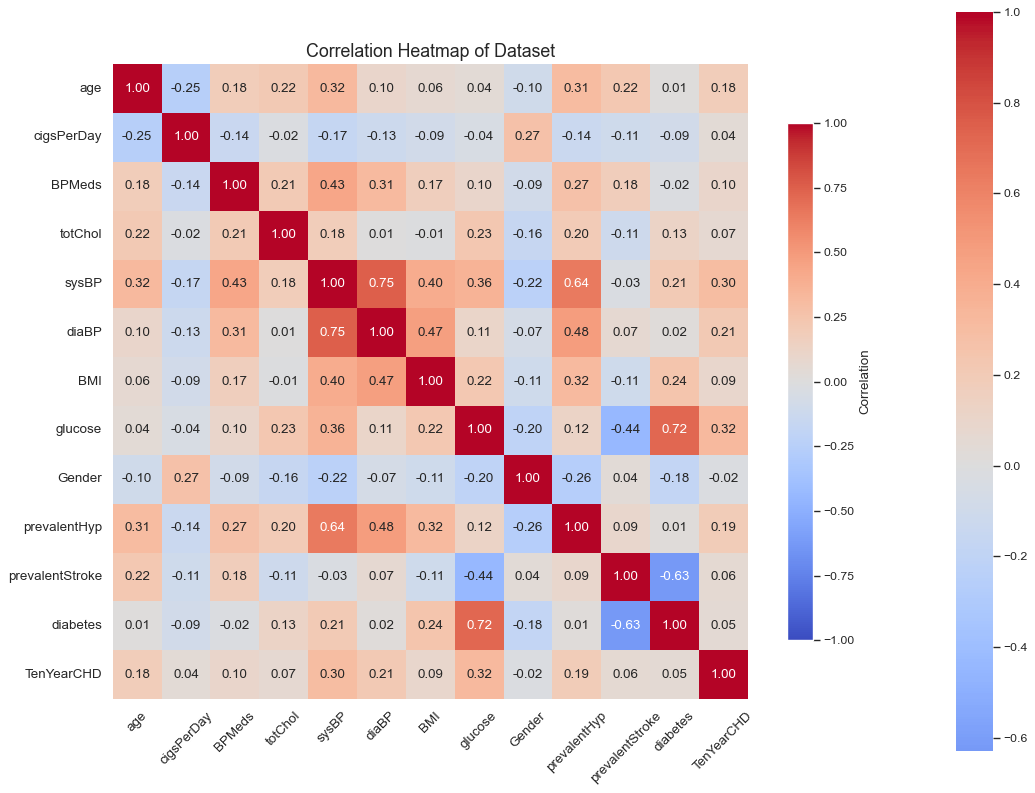

In [11]:
plt.figure(figsize=(16, 12), dpi=80)
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Dataset', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
dummy = plt.imshow([[0, 0], [0, 0]], cmap='coolwarm', vmin=-1, vmax=1)
heatmap.figure.colorbar(dummy, ax=heatmap, orientation='vertical', shrink=0.7, label='Correlation')
plt.show()

### Observations

The above graph shows us the coefficient of correlation value between different factors and target variable where "-1"  means the factor is least correlating and "1" means the factor is most correlating.

To get high accuracy from the model we will take only those features which have maximum value of correlating coefficient this is called feature engineering.
Selected Features:-
# a. INPUT FEATURES
1. gender
2. age 
3. cigsPerDay
4. BPMeds
5. prevalentStroke
6. prevalentHyp
7. diabetes
8. totChol
9. sysBP
10. diaBP
11. BMI
12. glucose

# b. TARGET VARIABLE
TenYearCHD

### Exploratory Data Analysis

In [12]:
def condition_ratio(data):
    results = data['TenYearCHD'].value_counts()
    values = [results[0], results[1]]
    labels = ['Low probability', 'High probability']
    colors = ['MediumSeaGreen', 'Coral']
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py
condition_ratio(df)

<module 'plotly.offline' from 'C:\\Users\\ishaa\\AppData\\Roaming\\Python\\Python310\\site-packages\\plotly\\offline\\__init__.py'>

### Observation

From this pie chart we can see that after oversampling both high probability cases and low probability cases are equal(50%)

### Feature variable Gender vs target(TenYearCHD)

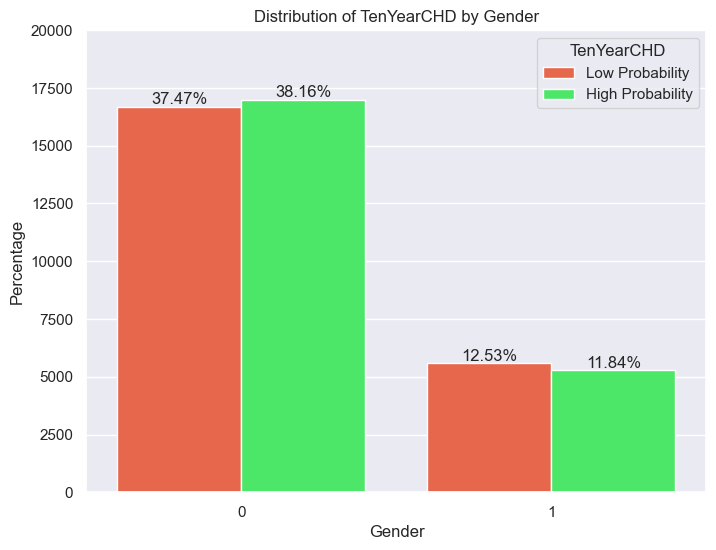

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='Gender', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 20000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

From oversampling the number of cases of both 0 and 1 are increased 
1. Both the high probability and low probability are almost same for both male and female
2. The number of females after oversampling is increased in the dataset

### Feature variable Age vs target(TenYearCHD)

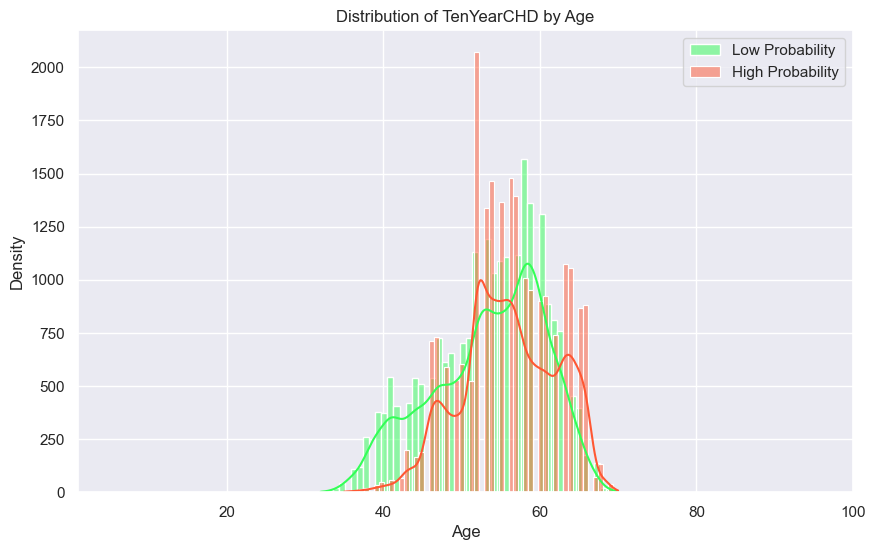

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#33FF57', '#FF5733']
plt.figure(figsize=(10, 6))
sns.set_palette(custom_colors)
df_0 = df[df['TenYearCHD'] == 0]
df_1 = df[df['TenYearCHD'] == 1]
sns.histplot(data=df_0, x='age', kde=True, color='#33FF57', label='Low Probability')
sns.histplot(data=df_1, x='age', kde=True, color='#FF5733', label='High Probability')
plt.title('Distribution of TenYearCHD by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.xlim(1, 100) 
plt.show()


### Observations

After oversampling the number of higher probability cases are now more than lower probability cases between age 45-50.

### Feature variable CigsPerDay vs target(TenYearCHD)

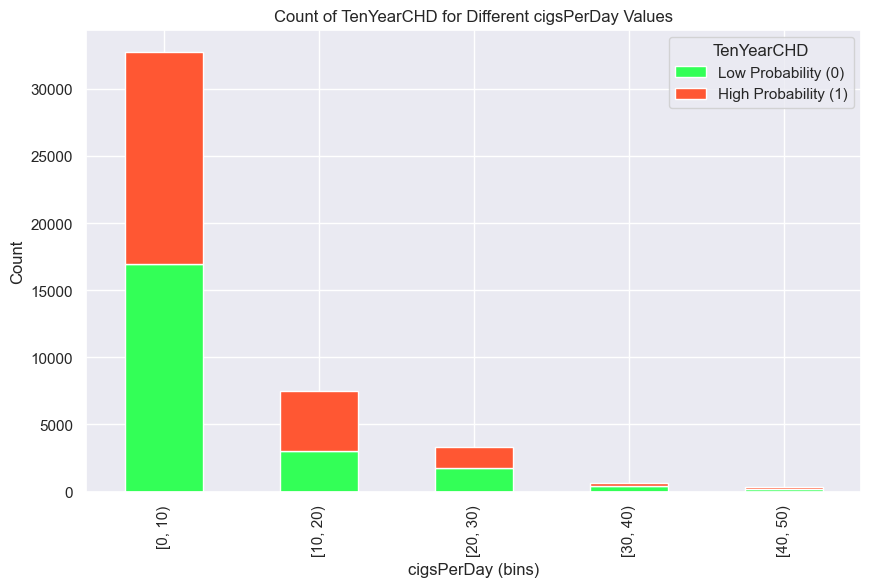

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df['cigsPerDay_bins'] = pd.cut(df['cigsPerDay'], bins=range(0,51, 10), right=False)
pivot_table = df.pivot_table(index='cigsPerDay_bins', columns='TenYearCHD', values='age', aggfunc='count')

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('cigsPerDay (bins)')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different cigsPerDay Values')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

After oversampling now all the cases are having higher probability than people with lower probability.

### Feature variable BPMeds vs target(TenYearCHD)

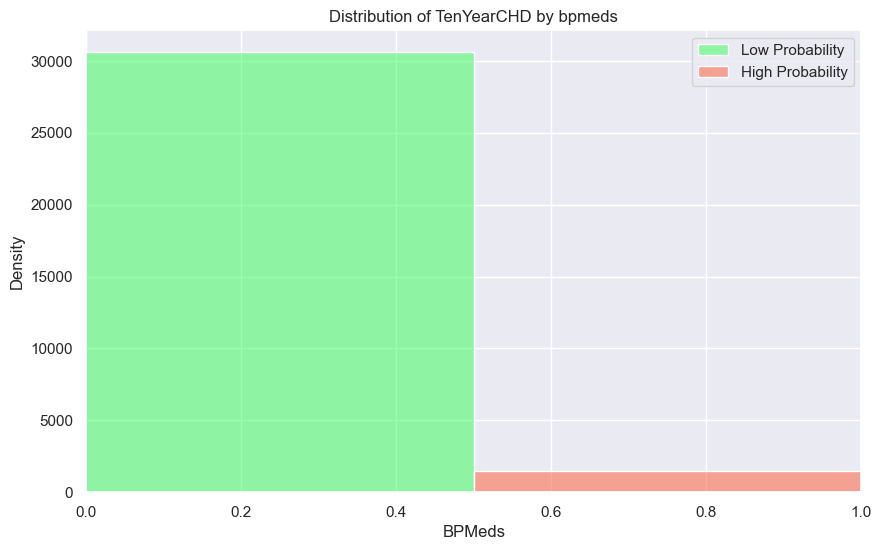

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#33FF57', '#FF5733']
plt.figure(figsize=(10, 6))
sns.set_palette(custom_colors)
df_0 = df[df['BPMeds'] == 0]
df_1 = df[df['BPMeds'] == 1]
sns.histplot(data=df_0, x='BPMeds', kde=True, color='#33FF57', label='Low Probability')
sns.histplot(data=df_1, x='BPMeds', kde=True, color='#FF5733', label='High Probability')
plt.title('Distribution of TenYearCHD by bpmeds')
plt.xlabel('BPMeds')
plt.ylabel('Density')
plt.legend()
plt.xlim(0,1) 
plt.show()


### Observations

After oversampling the people who are not taking BP meds are mostly having a lower probability but those who are taking.

### Feature variable PrevalentStroke vs target(TenYearCHD)

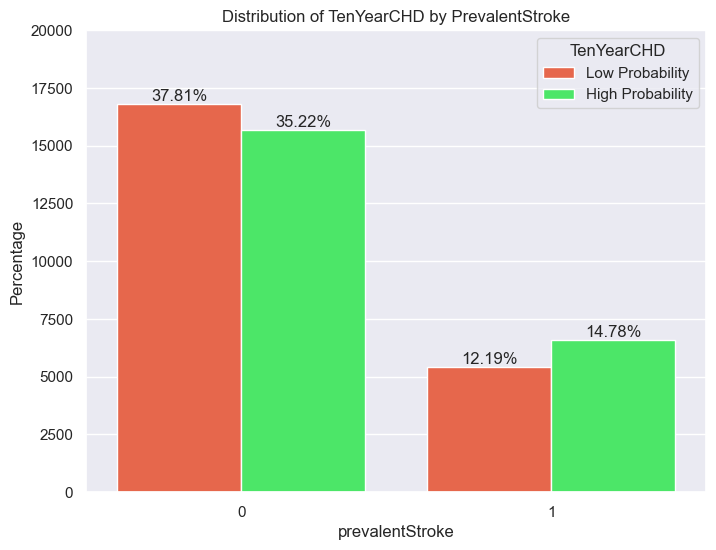

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by PrevalentStroke')
plt.xlabel('prevalentStroke')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 20000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

After oversampling both the cases of having and not having prevalentStroke are now almost equal.

### Feature variable Prevalent Hyp vs target(TenYearCHD)

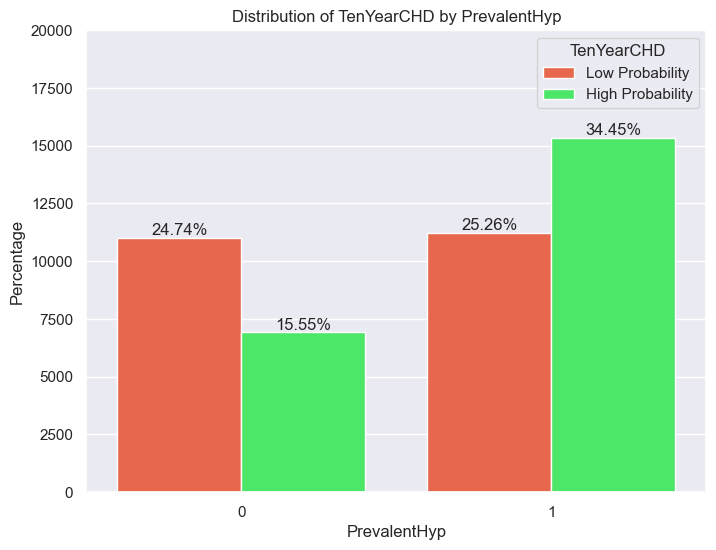

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by PrevalentHyp')
plt.xlabel('PrevalentHyp')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 20000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

After oversampling the person who are having a prevalentHyp are now having a higher chance than that who are not having prevalentHyp.

### Feature variable Diabetes vs target(TenYearCHD)

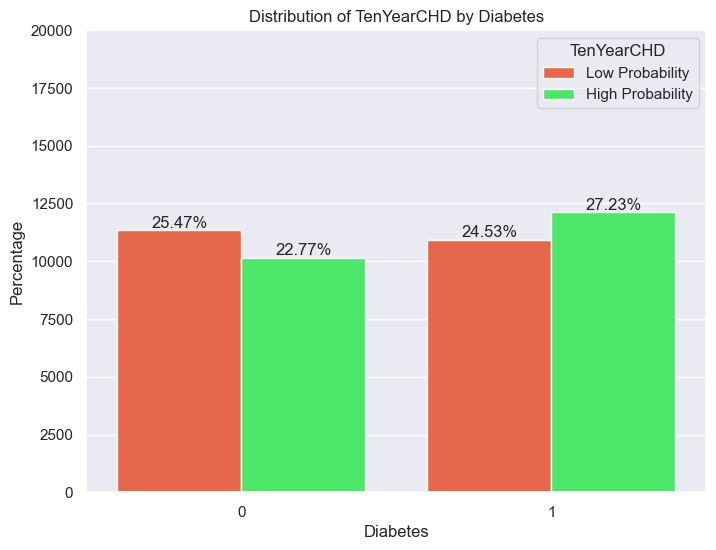

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='diabetes', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 20000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

After oversampling the person who are suffering from diabetes and are not suffering from diabetes are approximately equal.

### Feature variable Total Cholesterol vs target(TenYearCHD)

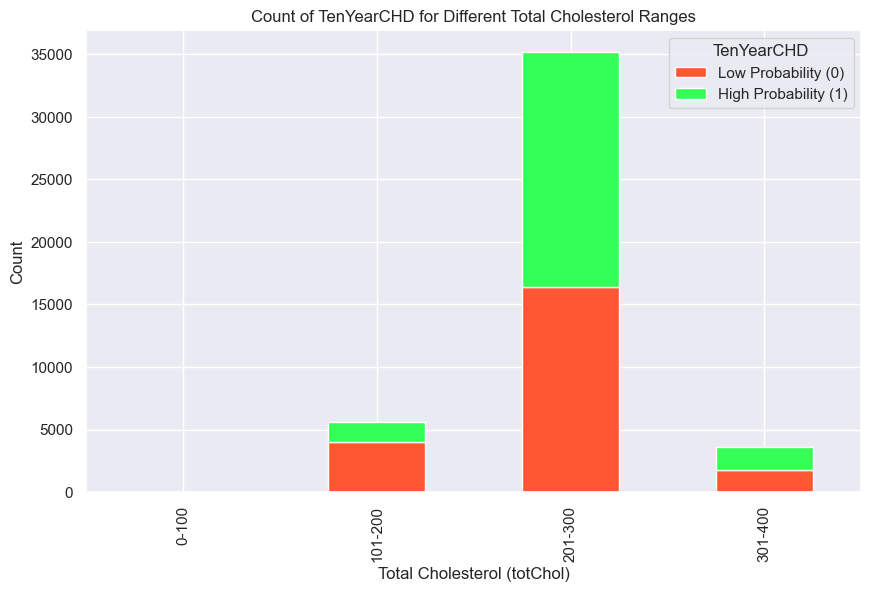

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200, 300, 400]
labels = ['0-100', '101-200', '201-300', '301-400']
df['totChol_category'] = pd.cut(df['totChol'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Total Cholesterol (totChol)')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different Total Cholesterol Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

After oversampling the person whose cholesterol level is in range 200-300 are having the highest chances of getting a heart disease.

### Feature variable sysBP vs target(TenYearCHD)

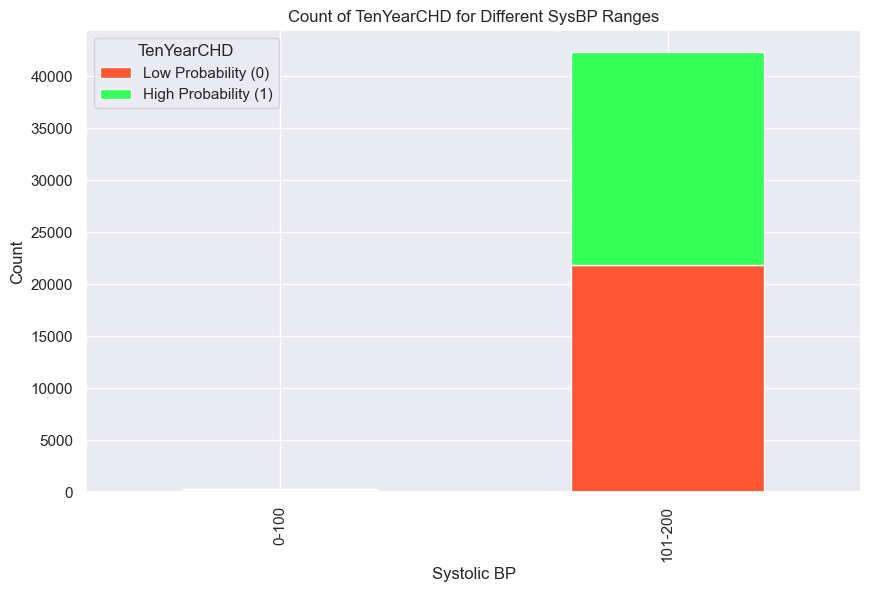

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200]
labels = ['0-100', '101-200']
df['totChol_category'] = pd.cut(df['sysBP'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Systolic BP')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different SysBP Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

After oversampling the person with systolic bp in range 100-200 are having the highest probability of getting a heart disease and there are very few person having systolic bp less than 100.

### Feature variable diaBP vs target(TenYearCHD)

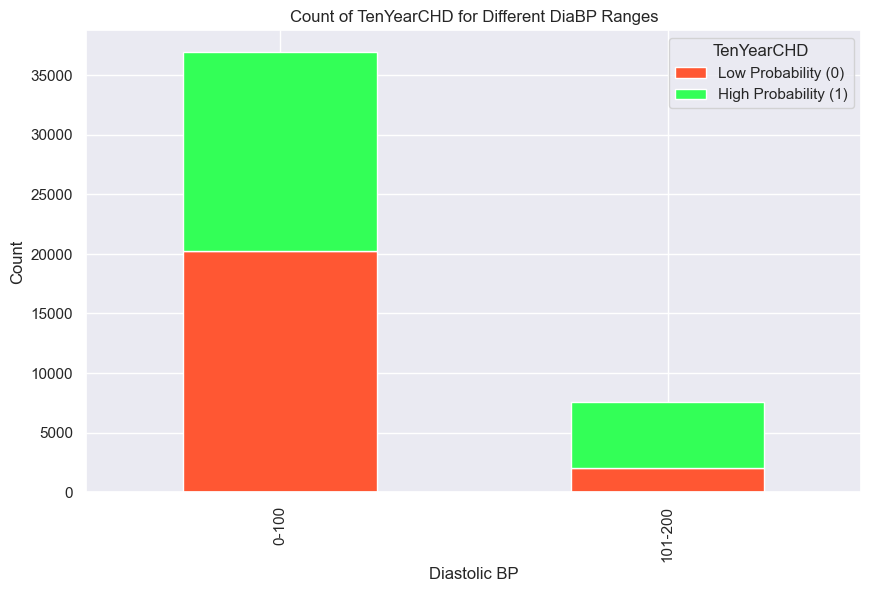

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200]
labels = ['0-100', '101-200']
df['totChol_category'] = pd.cut(df['diaBP'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Diastolic BP')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different DiaBP Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

After oversampling the person with diastolic BP in range 100-200 are having more chances of getting a heart disease than those in range of 0-100.

### Feature variable BMI vs target(TenYearCHD)

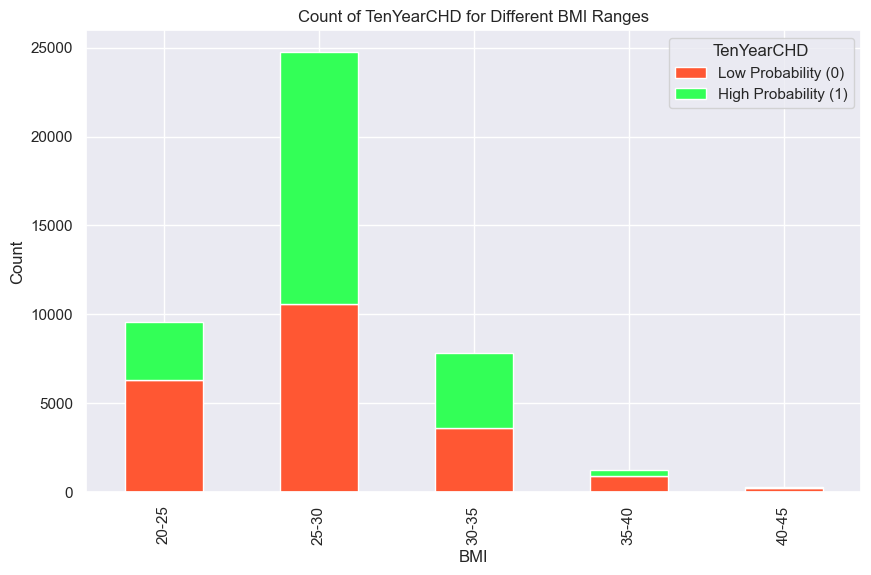

In [23]:
bmi_bins = [20, 25, 30, 35, 40, 50]
bmi_labels = ['20-25', '25-30', '30-35', '35-40', '40-45']
df['bmi_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
pivot_table_bmi = df.pivot_table(index='bmi_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table_bmi.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different BMI Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()

### Observations

After oversampling the people with BMI in range 25-30 are hvaing the highest chances of getting heart disease and most of the people in our dataset fall in this range.

### Feature variable glucose vs target(TenYearCHD)

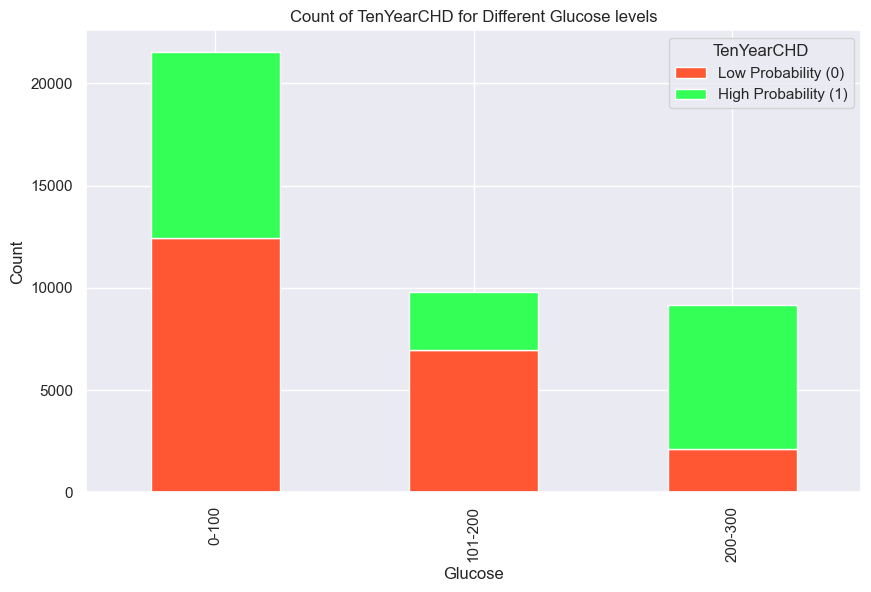

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200,300]
labels = ['0-100', '101-200','200-300']
df['totChol_category'] = pd.cut(df['glucose'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different Glucose levels')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

After sampling the people with Glucose level in range 0-100 are the highest and the people fallling in range 200-300 are having the highest chances of getting heart disease.